# Regular Expressions for Pattern-Matching

If you use Find-and-Replace regularly in your life, you know just how much of a time-saver it can be.

As powerful as it is, find-and-replace is limited in its ability. For instance, it can't help us find every instance of `<p>...</p>` tags and replace them with `<div>...</div>` ... can it?

This is where regular expressions come in. **Reg**ular **ex**pressions, also referred to as "regex", are a special language for specifying *patterns* to match in a block of text.

RegExes are supported in Notepad++, Jupyter Notebook, and other powerful text editors. There is also supported a regex module in just about every programming language, so time spent learning it is definitely time well spent!

### References

Quick Start: https://www.regular-expressions.info/quickstart.html  
Full Reference: https://www.regular-expressions.info/refcharacters.html

### Tools

https://regex101.com/

This tool visually demonstrates what your regular expression does with a test string that you specify.

## Sample text

Throughout this exercise, the HTML file `Regular-Expressions.html` will be used.

Solutions to each task can be found at the end of this notebook. They are provided in the form of a regular expression you can use in search.

You should open this file in Notepad++ and use the Find menu to apply regular expressions. Apply the settings as seen below:

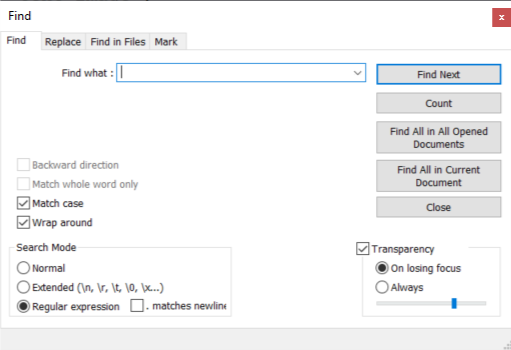

Remember to set Search Mode back to "Normal" when you no longer want to use regular expressions in search.

# Introduction

To use regular expressions in search, type a valid regular expression into the search box.

### Task 1

Type `<p>` into the search box. Keep clicking "Find Next" or press Enter. What happens?

Regular expressions work by attempting to find substrings that obey the *expression* you are typing into the search box. That's right: in regex mode, you are not typing search terms, but a programming expression!

With each task below, keep pressing Enter (or click "Find All in Current Document") to see what matches your expression returns. This will help you better understand what each expression does.

## Special symbols

The following symbols have special meaning in RegEx:

    [\^$.|?*+()

Any other symbol may be used naturally in search. The above characters must be escaped with a backslash (`\`). They are used for the following:

- `[`: to specify [character sets](#4%3E-Character-sets) and [character classes](#5%3E-Character-classes)
- `\`: to [escape special characters](#2%3E-Escaping-special-characters)
- `^` & `$`: to indicate word boundaries (anchors; not covered in this exercise)
- `[^]` (`^` inside `[]`): [Negation](#8%3E-Negation)
- `.`: [Wildcard](#6%3E-Wildcard) (matches any character)
- `|`: to specify [alternate terms](#3%3E-Alternation)
- `?`, `*`, and `+`: to specify [repetition](#7%3E-Repetition)
- `()`: to indicate [matching groups](#10%3E-Matching-Groups)

Note that in specific circumstances, the above symbols may have other meanings as well.

## 2> Escaping special characters

The following symbols represent non-printable characters:

- `\t`: tab character
- `\r`: carriage return
- `\n`: newline

On Linux and other Unix systems, `\n` will match a line break. On Windows systems, you need to use `\r\n` instead.

### Task 2a

Match the text `quickstart.html` in the exercise file.

### Task 2b

Match all substrings consisting of `</script>` followed by `<script` on the next line.

**Example**

```
</script>
<script
```

## 3> Alternation

The pipe (`|`) allows us to specify multiple terms to match.

**Example**

`script|/script` matches `script` and `/script`.

### Task 3

Match all `<tr>` and `</tr>` tags, regardless of case.

----------

Excessive use of alternation can lead to very long and tedious search expressions. For cases where the alternate terms are very similar, we should use other features to shorten the search expression

## 4> Character sets

The brackets `[]` allow us to specify what characters to match. For instance, `[Aa]` allows us to specify matches for both uppercase and lowercase `a`, and `gr[ae]y` matches both `gray` and `grey`.

### Task 4a

Match all `</a>` and `</a>` tags, regardless of case.

### Task 4b

Match all `</tr>` tags, regardless of case.

----------

**Note:** Regardless of the expression length between the brackets, it only matches one character! So `[tr]` will only match `t` or `r`, but not `tr`.

## 5> Character classes

It is tedious to use `[abcdefghijklmnopqrstuvwxyz]` to specify "all lowercase characters", so there are shorter expressions available to substitute them:

- `A-Z`: specifies any uppercase character from `A` to `Z`. This works for any other character range as well, e.g. `B-G`.
- `a-z`: specifies any character from `a` to `z`. This works for any other character range as well, e.g. `b-g`.
- `0-9`: specifies any digit from `0` to `9`.

Within `[]`, the special symbols `[\^$.|?*+()` do not need to be escaped.

### Task 5a

Match the first two characters of all HTML tags that are uppercase (e.g. `<A>`, `<BR>`, `<DIV`, ...)

## 6> Wildcard

The period (`.`) matches any character (except line break: `\n`). `gr.y` matches `gray`, `grey`, `gr%y`, etc.

This takes a while for regex newcomers to get used to, and is a frequent source of early mistakes. Once you master the use of `.`, you will get much better at regex :)

For example, the expression `.html` may appear to match only `.html` in the text file (because `.` matches any character, including itself!), But if you try it in the file, you will find it also matches `_html` (where `_` represents a space, in `<!DOCTYPE html>`) since `.` also matches ` `.

### Task 6

Match all expressions of the pattern `onmouseover="this.style.backgroundColor='#______';"` where the `_` can be any character.

## 7> Repetition

We are not always sure how many times a particular character might appear. Hex codes for colours can be 3 or 6 characters. Numbers can be anywhere from 1 to 6 digits (or more).

To specify how a character or character class is to be repeated, regex allows us to place repetition symbols immediately after the character to specify variable frequency of occurrence:

- `?`: zero or one (of the previous character)
- `*`: zero or more
- `+`: one or more

**Examples**

`_?` (`_` represents space character) matches zero spaces or one space

`.*` represents a sequence of zero or more characters

`[0-9]+` represents one or more digits

----------

Using `.*` for everything is usually ill-advised unless you are absolutely sure you want ! We usually use specific character classes, such as `[0-9A-Fa-f]` to match hexadecimals.

### Task 7a

Match all attribute-less HTML tags (such as `<HTML>`/`</HTML>`, `<BODY>`/`</BODY>`, `<BR>`, ...)

*Hint 1:* What are the similarities between each occurrence? What are the differences?

*Hint 2:* You can use `</?` to match tags that begin with `<` and `</`.

*Hint 3:* Use character classes and repetition symbols to specify a variable number of characters

### Task 7b

Match all `<META ...>` tags.

## 8> Negation

Sometimes, we want to specify characters **not** to match instead. For example, to match a sentence, we might try a regex that means "substring that starts with uppercase character, followed by one or more characters that are not `.` or `!` or `?`". This would be specified as `[A-Z][^.!?]+` instead of `[A-Z].+`.

- `.+`: matches one or more of any character
- `[^.!?]+`: matches one or more of the character class `[^.!?]`, which consists of any character that is **not** `.`, `!`, or `?`.

To mark a character class as a **negation**, put `^` as the first character within the `[]` brackets.

### Task 8

HTML attributes should be double-quoted, e.g. `<a href="quickstart.html">`. The HTML file in this example has some tags with improper attributes (e.g. `<BODY BGCOLOR=white TEXT=black>`).

Match all improper `attribute=value` pairs (i.e. `value` is not enclosed in double-quotes `"`).

*Hint:* write an expression that matches a valid attribute, followed by `=`, followed by one-or-more non-doublequote characters.

## 9> Matching

### Greedy matching

The wildcard character `.` is very powerful, especially when paired with the zero-or-more repetition symbol `*`. It is easy to misapply it without understanding what regex does with it.

For example, we might try to match all quoted strings (i.e. `"phrases between double-quotation marks"`) with the following expression: `".*"`. Try this; you'll notice that it doesn't match *only* quoted phrases!

With a line like this:

    <LINK REL=StyleSheet HREF="regex.css" TYPE="text/css">

The expression `".*"` does not match `"regex.css"` and `"text/css"` separately, but matches them together as `"regex.css" TYPE="text/css"`.

This behaviour is the default in regex and it is known as **greedy matching**. This means regex will attempt to match as many characters as possible.

With greedy matching, `".*"` means "match as many characters as possible between `"` and `"` (until end of line)". `"regex.css" TYPE="text/css"` is the *longest substring* that fulfills this criteria, and it is what gets returned.

### Lazy matching

If you want a repetition symbol to perform **lazy matching**, i.e. to return the *shortest substring* that fulfills the criteria, add a `?` after the repetition symbol.

With lazy matching, `".*?"` will match `"regex.css"` and `"text/css"` separately. Try it!

### Using negations in greedy matching

One common way to match quoted strings (whether using `''`, `""`, `[]`, `{}`, `()`, `<>`, ...) is to match the opening character, followed by a *negated closing character*. This expression "catches" the first closing character, allowing it to behave similarly to lazy matching

Try the examples below:

**Example**

`"[^"]*"` matches `"`, followed by zero-or-more `[^"]`, followed by `"` again.

`([^)]*)` matches `(`, followed by zero-or-more `[^)]`, followed by `)` again.

### Task 9a

Match all HTML tags, with or without attributes (similar to Task 7a but including `<SPAN CLASS="...`)

### Task 9b

Match all HTML tags that have an opening and closing tag (e.g. `<DIV...></DIV>`)

## 10> Matching Groups

In **Task 7b**, `<META.*>` will match `<META NAME="Author" CONTENT="Jan Goyvaerts">` but not `<meta name=viewport content="width=device-width, initial-scale=1">`.

`META|meta` will match `META` or `meta`.  
Yet, if we attempt to use `<META|meta.*>` this will fail; it will match `<META` or `meta.*>` which is not what we want.

How do we specify `<META.*>` and `<meta.*>` in a single expression?

We need to **group** parts of the expression together.

The pattern we are trying to match is `<____.*>`, where `____` is either `META` or `meta`. We can use `<(META|meta).*>` to force regex to recognise `META|meta` as a group within the expression, rather than as individual characters.

### Using groups to match repeating patterns

Can we use regex to extract inline javascript in attributes, such as `"this.style.backgroundColor='#A03300';return false;"`, inside HTML elements?

What we can see:

- They are nested between double-quotes `""`
- They consist of **one or more expressions** ...
- that end with a semicolon (`;`)

The expression `"[^";];"` (see [Using negations in greedy matching](#Using-negations-in-greedy-matching)) helps us to match **a single** javascript expression between double-quotes (`"`), such as `"this.style.backgroundColor='#FFA000';"`. But it will not match **multiple** javascript expressions between double-quotes, such as `"this.style.backgroundColor='#A03300';return false;"`.

### Task 10

Modify the expression `"[^";];"` so that it can match **multiple** javascript expressions between double quotes, such as `"this.style.backgroundColor='#A03300';return false;"`.

## Summary Task

Write an expression that will match all of the following:

- `ads/pgr100.png 1x`
- `ads/pgr125.png 1.25x`
- `ads/pgr150.png 1.5x`
- `ads/pgr175.png 1.75x`
- `ads/pgr200.png 2x`
- `ads/pgr250.png 2.5x`
- `ads/pgr300.png 3x`

*Hint:* You may wish to use https://regex101.com/ to help debug your expression

# Regular expressions in Python

In Python, regular expressions are used through the `re` package.

    import re
    m = re.search('(?<=abc)def', 'abcdef')
    m.group(0)

The `re.search(pattern, inputstr)` function takes in two string arguments. The `pattern` parameter is a string specifying the regex you wish to use, and the `inputstr` parameter is the string you wish to apply the regex to.

If there are no matches for `pattern` within `inputstr`, `re.search()` returns `None`. If there are matches, `re.search()` returns a match object.

## `re` match object

The match object is a class that encapsulates the results of the regex match.

The `match.group()` method returns the results of the match. `match.group(0)` always returns the entire match.

If you used [matching groups](#10%3E-Matching-Groups), `match.group(i)` returns the i-th group that was matched.

**Example**

This simple regex helps to validate domain names: `https://([A-Za-z0-9-.]*)([A-Za-z0-9]+)\.([A-Za-z0-9]+)` (Not recommended for robust use!)

It consists of two or more capturing groups; the last two capturing groups `([A-Za-z0-9]+)` attempt to capture the last two parts of the domain name (to handle `domain.com` and `domain.com.sg` examples). The first capturing group `([A-Za-z0-9-.]*)` captures everything before the domain name.

- `match.group(1)` returns the first group (subdomain)
- `match.group(2)` returns the second group (domain string)
- `match.group(3)` returns the third group (TLD string)

### References

Python documentation: https://docs.python.org/3.6/library/re.html
RegEx tutorial for Python: https://realpython.com/regex-python/

## Python task

Write a Python function that takes in an email address (`str`), extracts the username and domain, and returns them as a 2-element tuple. Part of the code has been written for you.

You may treat the email address as lowercase (email addresses and domain addresses are meant to be case-insensitive).

*Hint 1:* An email address consists of a username, followed by a `@`, followed by a domain name.

*Hint 2:* A username consists of one or more alphanumeric characters, `.`, or `_`.

*Hint 3:* A domain name consists of a domain string, followed by a `.`, followed by a TLD (top-level domain). you may assume the domain name to consist of alphanumeric characters only, and the TLD to consist of alphabets only.

In [ ]:
import re

def parse_email(emailaddr: str):
    '''
    This function takes in an email address,
    and returns the username and domain as a 2-element tuple
    '''
    pattern = 'replace this string with your regex'
    m = re.search(pattern, emailaddr)
    # Use the re module to match
    # the username and domain in the email address
    # Write your code below, before the return line
    
    
    # do not remove this line
    # It returns the username and domain as a tuple
    return username, domain

**Note:** A proper email validation regex is much more complex than this! If you need to write one that handles as many improper email addresses as possible, see https://stackoverflow.com/questions/201323/how-to-validate-an-email-address-using-a-regular-expression

# Solutions

- Task 2a: `quickstart\.html` (`.` is a special character)
- Task 2b: `</script>\r\n<script`
- Task 3: `<tr>|</tr>|<TR>|</TR>`
- Task 4a: `</[Aa]>`
- Task 4b: `</[Tt][Rr]>`
- Task 5a: `<[A-Z]`
- Task 6: `onmouseover="this.style.backgroundColor='#......';"`
- Task 7a: `</?[A-Za-z]+>` (Between `<` and `>`, match zero-or-one `/` and match one-or-more `[A-Za-z]`)
- Task 7b: `<META.*>` (Between `<` and `>`, match `META` followed by zero-or-more of any character)
- Task 8: `[A-Za-z]+=[^"]` (One-or-more `[A-Za-z]`, followed by `=`, followed by a non-`[" >]` character. `[" >]` character will end an unquoted value)
- Task 9a: `<[^>]*>`
- Task 9b: `<[^/>]*>.*</[^>]*>` (`<` followed by zero-or-more non-`[/>]` character followed by `>`, followed by zero-or-more characters, followed by `</`, then zero-or-more non-`[>]` character, then `>`)
- Task 10: `"([^";]+;)+"` (`"` followed by one-or-more `[^";]+;` expressions, followed by `"`)
- Summary Task: `ads/pgr[0-9]+\.png [1-3](.[0-9]+)?x` (`ads/pgr` followed by one-or-more `[0-9]`, followed by `.png_`, followed by a digit `[1-3]`, followed by zero-or-one `.[0-9]+`, followed by `x`) -- `_` means space here

## Python task suggested soln

    import re

    def parse_email(emailaddr: str):
        '''
        This function takes in an email address,
        and returns the username and domain as a 2-element tuple
        '''
        pattern = '([a-z0-9.+_]+)@(a-z0-9)\.(a-z0-9)'
        m = re.search(pattern, emailaddr)
        usename = m.group(1)    # first matching group
        domainstr = m.group(2)  # second matching group
        tld = m.group(3)        # third matching group
        
        # Put the domain together from domainstr and tld
        domain = f"{domainstr}.{tld}"

        return username, domain